Forecast

In [3]:
#!pip install zipfile36

In [10]:
#!pip  install requests

In [62]:
!pip install skforecast

In [63]:
pip install skforecast==0.4.1

     |████████████████████████████████| 79 kB 8.9 MB/s             
  Attempting uninstall: skforecast
    Found existing installation: skforecast 0.4.2
    Uninstalling skforecast-0.4.2:
      Successfully uninstalled skforecast-0.4.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip3 install -U scikit-learn

In [2]:
!pip install statsmodels==0.12.2

In [3]:
!pip install skforecast

In [18]:
!pip install git+https://github.com/JoaquinAmatRodrigo/skforecast#master

  Cloning https://github.com/JoaquinAmatRodrigo/skforecast to /tmp/pip-req-build-8mt8l8dm
  Running command git clone --filter=blob:none -q https://github.com/JoaquinAmatRodrigo/skforecast /tmp/pip-req-build-8mt8l8dm
  Resolved https://github.com/JoaquinAmatRodrigo/skforecast to commit 5ad6f6aa67129713b93bda1df2919687e788d7ee
  Preparing metadata (setup.py) ... done
  Created wheel for skforecast: filename=skforecast-0.4.3.dev5-py3-none-any.whl size=83525 sha256=3ff3ff317dacc21cb69d21540ed3021eae6489e6d458b71cc00d3e0bc8dc3920
  Stored in directory: /tmp/pip-ephem-wheel-cache-a6_b0_0j/wheels/79/bf/aa/dfe103d1c0cdc8326cc1fda1f9338daaa2c0e4672719919162
Successfully built skforecast
  Attempting uninstall: skforecast
    Found existing installation: skforecast 0.4.1
    Uninstalling skforecast-0.4.1:
      Successfully uninstalled skforecast-0.4.1


In [19]:
# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

In [71]:
# Librerias
# ==============================================================================
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5

In [20]:
# Descarga de datos
# ==============================================================================
import requests, zipfile, io
url= 'https://docs.aws.amazon.com/redshift/latest/gsg/samples/tickitdb.zip'

In [21]:
# Preparación del dato
# =============================================================================
filename = 'sales_tab.txt'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
d = pd.read_csv(filename, sep='\t',names=['salesid','listid','sellerid','buyerid','eventid','dateid','qtysold','pricepaid','commission', 'saletime'])
#d = d.rename(columns={'x': 'y'})
d['saletime']= pd.to_datetime(d["saletime"])
d = d.set_index('saletime')
data=d.resample('W').sum() 
data = data.asfreq('W')
data = data.sort_index()
#print (data)
data.head()



,salesid,listid,sellerid,buyerid,eventid,dateid,qtysold,pricepaid,commission
saletime,,,,,,,,,
2008-01-06,31259741,36757331,8838506,685323,1617411,657124,720,244991,36748.65
2008-01-13,98391589,115414311,27569010,4860625,5072139,2128236,2331,734374,110156.10
2008-01-20,159069397,186614291,46967259,12769136,8093181,3503804,3852,1206758,181013.70
2008-01-27,209955257,247313004,61924520,22795263,10595574,4545639,4961,1613119,241967.85
2008-02-03,260630911,306021105,74688251,35251461,12844476,5569216,6021,1875270,281290.50


In [22]:
#start=data.index.min()
#end= data.index.max()
samples=len(data)
print(samples)
#print(start, end, samples)

53


In [73]:
n= int (len(data)*0.7) #37 semanas como conjunto de test para evaluar la capacidad predictiva del modelo.
n_test=samples-n
print(n)
print(n_test)

37
16


In [74]:
# Separación datos train-test
# ==============================================================================
#train=data[:n_train]  
#test= data[n_train:] 

train=data[:-n]  
test= data[-n:] 

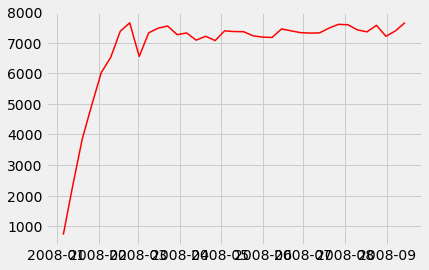

In [49]:
plt.plot(train['qtysold'],color='red',label='predicted')

In [75]:
# Crear y entrenar forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 6   #predictores: 16 semanas anteriores
             )

forecaster.fit(train['qtysold'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2008-01-06 00:00:00'), Timestamp('2008-04-20 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: W-SUN 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-03-05 03:50:19 
Last fit date: 2022-03-05 03:50:19 
Skforecast version: 0.4.1 

In [76]:
# Predicciones
# ==============================================================================

steps = n  #Una vez entrenado el modelo, se predicen los datos de test (37 semanas a futuro).
predicciones = forecaster.predict(steps=steps)
predicciones.head(5)

2008-04-27    7241.53
2008-05-04    7238.05
2008-05-11    7237.03
2008-05-18    7239.31
2008-05-25    7237.03
Freq: W-SUN, Name: pred, dtype: float64

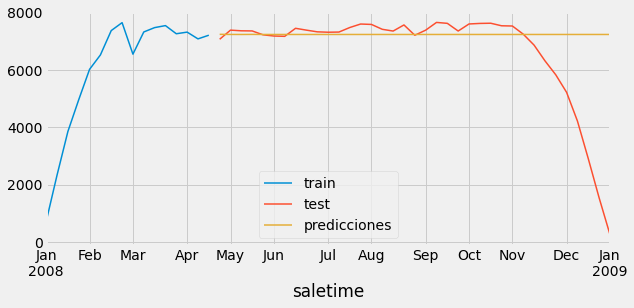

In [77]:
fig, ax = plt.subplots(figsize=(9, 4))
train['qtysold'].plot(ax=ax, label='train')
test['qtysold'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

In [78]:
# Error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = test['qtysold'],
                y_pred = predicciones
            )
print(f"Error de test (mse): {error_mse}")

Error de test (mse): 3179774.9008135125


In [79]:
# Grid search de hiperparámetros
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 4 # Este valor será remplazado en el grid search
             )

# Hiperparámetros del regresor
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

# Lags utilizados como predictores
lags_grid = [10, 20]

resultados_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = train['qtysold'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = 10,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(train)*0.5),
                        return_best        = True,
                        verbose            = False
                   )

loop lags_grid:   0%|                                               | 0/2 [00:00<?, ?it/s]

Number of models compared: 12


Exception: `initial_train_size` must be greater than forecaster's window_size (10).

In [ ]:
# Resultados Grid Search
# ==============================================================================
resultados_grid

In [ ]:
# MODELO FINAL
# Crear y entrenar forecaster con mejores hiperparámetros
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )
forecaster.fit(y=train['qtysold'])

In [ ]:
# Predicciones
# ==============================================================================
predicciones = forecaster.predict(steps=steps)

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
train['qtysold'].plot(ax=ax, label='train')
test['qtysold'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();


In [ ]:
# Error de test
# ==============================================================================
error_mse = mean_squared_error(
                y_true = datos_test['qtysold'],
                y_pred = predicciones
            )
print(f"Error de test (mse) {error_mse}")